<a href="https://colab.research.google.com/github/nimish1402/-Comparative-analysis-for-Alzheimer-s-Disease-Prediction-/blob/main/SVM_kernel_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Installing the dependencies

In [ ]:
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep
from tqdm.notebook import tqdm
import os
sns.set()

#2 Importing the data (through Kaggle API command )

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

 76% 26.0M/34.1M [00:00<00:00, 89.1MB/s]
100% 34.1M/34.1M [00:00<00:00, 85.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/alzheimers-dataset-4-class-of-images.zip")
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#Dataset that should go with Alzheimer label
very_mild = glob(r'/content/Alzheimer_s Dataset/train/VeryMildDemented/*')
print("Very Mild Demented:", len(very_mild))
mild = glob(r'/content/Alzheimer_s Dataset/train/MildDemented/*')
print("Mild Demented:", len(mild))
moderate = glob(r'/content/Alzheimer_s Dataset/train/ModerateDemented/*')
print("Moderate Demented:", len(moderate))

#Dataset without Alzheimer
non = glob(r'/content/Alzheimer_s Dataset/train/NonDemented/*')
print("Non Demented:", len(non))

Very Mild Demented: 1792
Mild Demented: 717
Moderate Demented: 52
Non Demented: 2560


**Sample Data**

/content/Alzheimer_s Dataset/train/NonDemented/nonDem1160.jpg
One of the data in Non Alzheimer Folder
Image shape:(208, 176)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
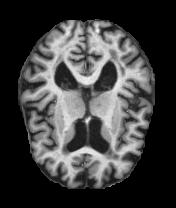

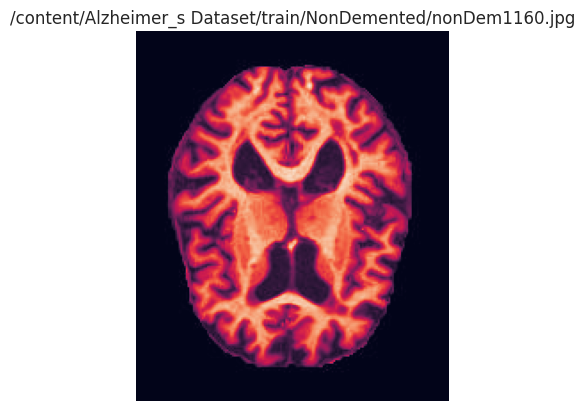

In [ ]:
print(non[1])
def view_image(directory):
    img = mpimg.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img

print('One of the data in Non Alzheimer Folder')
view_image(non[1])

Alzheimer Patient's Brain
Image shape:(208, 176)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
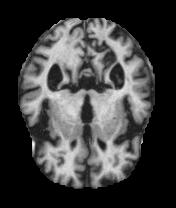

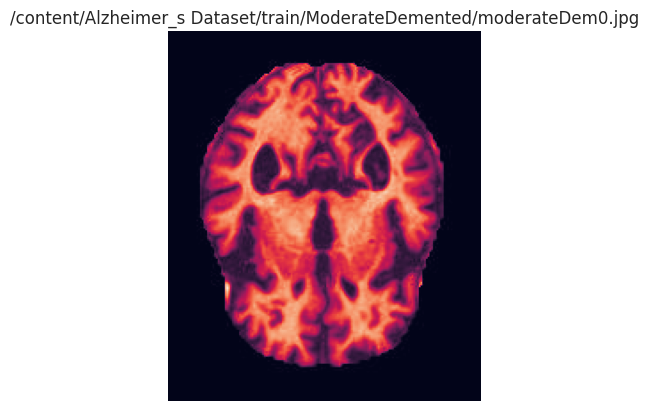

In [ ]:
print('Alzheimer Patient\'s Brain')
view_image(moderate[1])

# 3 SVM

In [ ]:
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height) #the data is just black to white

In [ ]:
#Iterate over pictures and resize them to 256 by 256
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting.
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        else:
            resized_image_array_label.append(1)

In [ ]:
ALZ = very_mild + mild + moderate
resizer(non)
resizer(ALZ)

In [ ]:
print(len(non))
print(len(ALZ)) #data are well transformed. Let's conduct SVM
print(len(resized_image_array))
print(resized_image_array[1])

2560
2561
5121
[0 0 0 ... 0 0 0]


** 3.1 Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)


# 4 Model Training


#4.1 Linear kernel  

In [ ]:
#train SVM model
#from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(train_x, train_y)

SVC(kernel='linear')

In [ ]:
#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

In [ ]:
#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #The training seems to be done with high accuracy on training data.

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1 :  1.0
Confusion matrix : [[2032    0]
 [   0 2064]]


In [ ]:
#Now, use the SVM model to predict Test data
y_pred = clf.predict(test_x)
y_true = test_y

In [ ]:
#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) #Having high training data accuracy might mean that it is having some overfitting

Accuracy :  0.9902439024390244
Precision :  0.9919191919191919
Recall :  0.9879275653923542
f1 :  0.9899193548387096
Confusion matrix : [[524   4]
 [  6 491]]


#   4.2 SVM Polynomial kernel


In [ ]:
clf = svm.SVC(kernel = 'poly', degree = 2)
clf.fit(train_x, train_y)

SVC(degree=2, kernel='poly')

In [ ]:
#store predictions and ground truth
y_pred = clf.predict(train_x)
y_true = train_y

In [ ]:
#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

Accuracy :  0.9140625
Precision :  0.9018779342723005
Recall :  0.9307170542635659
f1 :  0.916070577014783
Confusion matrix : [[1823  209]
 [ 143 1921]]


Predicted class: Alzh


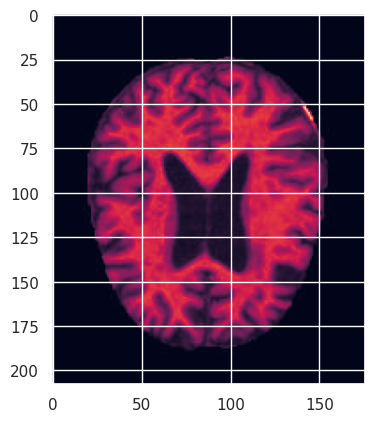

In [ ]:
def predict_class(image_path, model):
    # Load the image
    img = Image.open('/content/Alzheimer_s Dataset/test/VeryMildDemented/26 (46).jpg')
    plt.imshow(img)
    # Resize the image
    img = img.resize(new_size)

    # Convert the image to a numpy array
    img_array = np.array(img)

    # Flatten the image array
    img_flat = img_array.reshape(1, -1)

    # Predict the class using the SVM model
    predicted_class = model.predict(img_flat)

    # Map the predicted class to the corresponding label
    if predicted_class == 0:
        return "NonALz"
    else:
        return "Alzh"

# Example usage:
image_path = "path_to_your_image.jpg"
predicted_class = predict_class(image_path, clf)
print("Predicted class:", predicted_class)
